In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("diabetes_dataset.csv")

In [3]:
df

,age,gender,ethnicity,education_level,income_level,employment_status,smoking_status,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,...,hdl_cholesterol,ldl_cholesterol,triglycerides,glucose_fasting,glucose_postprandial,insulin_level,hba1c,diabetes_risk_score,diabetes_stage,diagnosed_diabetes
0,58,Male,Asian,Highschool,Lower-Middle,Employed,Never,0,215,5.7,...,41,160,145,136,236,6.36,8.18,29.6,Type 2,1
1,48,Female,White,Highschool,Middle,Employed,Former,1,143,6.7,...,55,50,30,93,150,2.00,5.63,23.0,No Diabetes,0
2,60,Male,Hispanic,Highschool,Middle,Unemployed,Never,1,57,6.4,...,66,99,36,118,195,5.07,7.51,44.7,Type 2,1
3,74,Female,Black,Highschool,Low,Retired,Never,0,49,3.4,...,50,79,140,139,253,5.28,9.03,38.2,Type 2,1
4,46,Male,White,Graduate,Middle,Retired,Never,1,109,7.2,...,52,125,160,137,184,12.74,7.20,23.5,Type 2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,46,Male,Other,Graduate,Upper-Middle,Unemployed,Former,1,136,8.3,...,45,150,116,113,109,14.58,5.55,26.0,Pre-Diabetes,0
99996,41,Female,White,Graduate,Middle,Employed,Never,3,76,8.8,...,55,123,146,96,146,9.02,5.97,24.4,Pre-Diabetes,0
99997,57,Female,Black,No formal,Upper-Middle,Employed,Former,4,121,9.9,...,50,111,184,93,132,2.57,5.21,27.6,No Diabetes,0
99998,47,Female,Black,Highschool,Lower-Middle,Retired,Never,3,52,5.9,...,68,91,116,106,117,9.81,5.53,26.4,Pre-Diabetes,0


In [ ]:
df.describe()

In [ ]:
df.info()

**Distribucion por género de la diabetes**


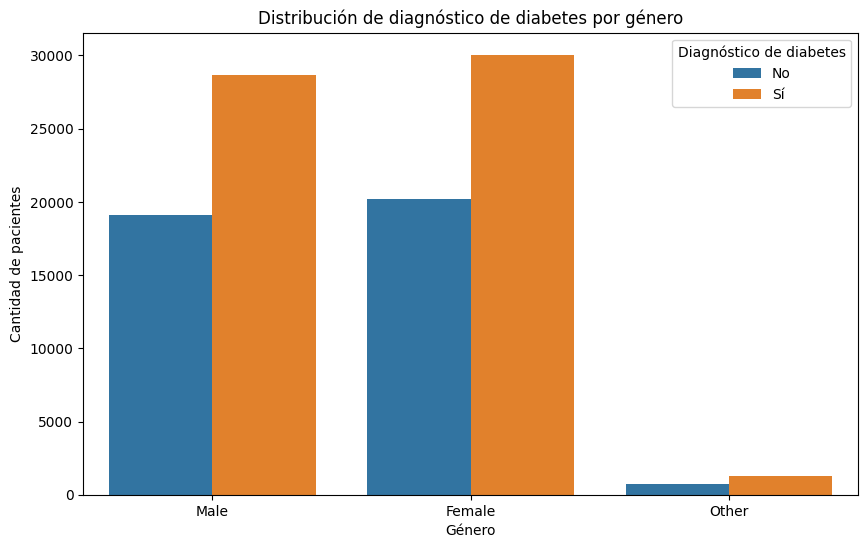

In [11]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df,x="gender",hue="diagnosed_diabetes")
plt.xlabel("Género")
plt.ylabel("Cantidad de pacientes")
plt.title("Distribución de diagnóstico de diabetes por género")
plt.legend(title="Diagnóstico de diabetes", labels=["No", "Sí"])

Como es de esperar no se observa una gran diferencia entre si tiene diabetes y el género de las personas

**Distribucion por ingresos de diabetes**

In [15]:
df["income_level"].replace({"Low":"Bajo","Middle":"Medio","High":"Alto","Lower-Middle":"Medio-Bajo","Upper-Middle":"Medio-Alto"},inplace=True)

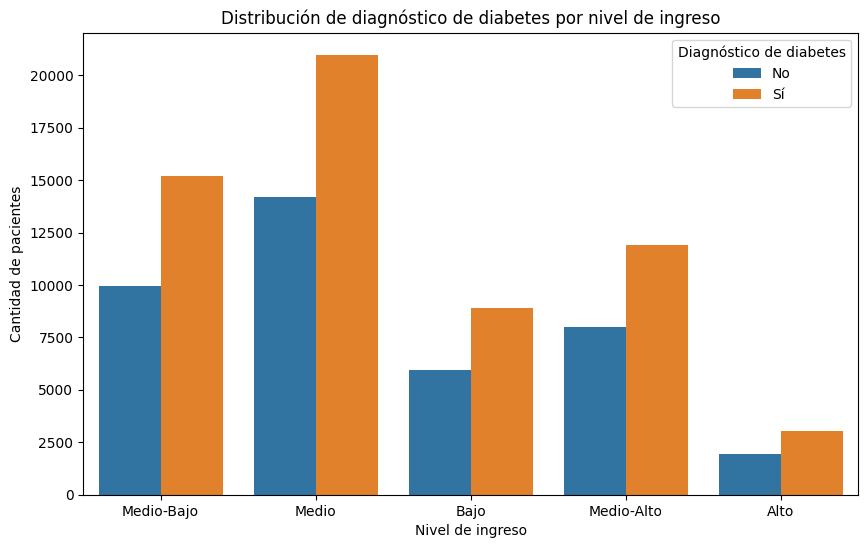

In [16]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df,x="income_level",hue="diagnosed_diabetes")
plt.xlabel("Nivel de ingreso")
plt.ylabel("Cantidad de pacientes")
plt.title("Distribución de diagnóstico de diabetes por nivel de ingreso")
plt.legend(title="Diagnóstico de diabetes", labels=["No", "Sí"])

Curiosamente las personas ubicadas en el nivel de ingreso medio son las que poseen mas diabetes,esto quizas es debido a que tienen mayor poder adquisitivo que los de nivel bajo pero no tienen el mismo acceso a la calidad de alimento y mejores servicios de salud de los de nivel alto

**Distribucion si es fumador activo, retirado o nunca lo ha hecho y el diagnostico de diabetes**

In [19]:
df["smoking_status"] = df["smoking_status"].replace({"Never":"Nunca","Former":"Anteriormente","Current":"Actualmente"})

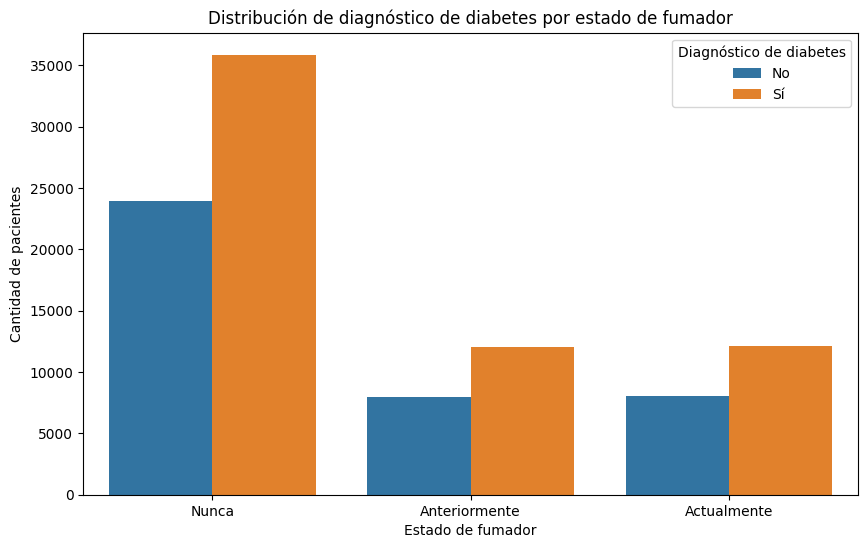

In [20]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df,x="smoking_status",hue="diagnosed_diabetes")
plt.xlabel("Estado de fumador")
plt.ylabel("Cantidad de pacientes")
plt.title("Distribución de diagnóstico de diabetes por estado de fumador")
plt.legend(title="Diagnóstico de diabetes", labels=["No", "Sí"])

Aunque la gráfica muestra algo contraintuitivo esto se puede deber a que la proporcion de no fumadores es mucho mayor respecto a los otros dos estados, tambien a un efecto de superviviencia, muchos fumadores no llegan a ser diagnosticados con diabetes antes de su muerte. Y finalmente una compensacion de ansiedad con los no fumadores se lleva a cabo con el alimento lo cual ayuda al diagnostico de diabetes

**Porcentaje de gente que tiene diabetes segun la cantidad de veces que consume alcohol en la semana**

In [35]:
porcentajes_por_consumo_de_alcohol = df.groupby("alcohol_consumption_per_week")["diagnosed_diabetes"].value_counts(normalize=True).unstack().fillna(0) * 100
porcentajes_por_consumo_de_alcohol

diagnosed_diabetes,0,1
alcohol_consumption_per_week,,
0,39.748799,60.251201
1,40.451936,59.548064
2,39.831852,60.168148
3,39.863657,60.136343
4,39.460999,60.539001
5,40.832178,59.167822
6,39.398734,60.601266
7,40.730337,59.269663
8,47.126437,52.873563


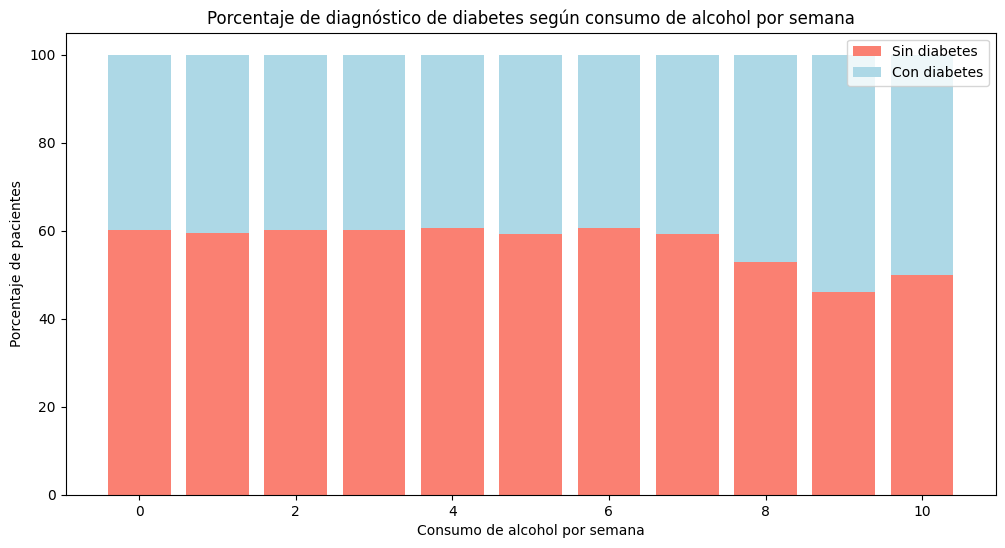

In [41]:
plt.figure(figsize=(12, 6))
plt.bar(porcentajes_por_consumo_de_alcohol.index, porcentajes_por_consumo_de_alcohol[1], label='Con diabetes', color='salmon')
plt.bar(porcentajes_por_consumo_de_alcohol.index, porcentajes_por_consumo_de_alcohol[0], bottom=porcentajes_por_consumo_de_alcohol[1], label='Sin diabetes', color='lightblue')
plt.xlabel("Consumo de alcohol por semana")
plt.ylabel("Porcentaje de pacientes")
plt.title("Porcentaje de diagnóstico de diabetes según consumo de alcohol por semana")
plt.legend(labels=["Sin diabetes", "Con diabetes"])

Con un consumo relativamente moderado (de 0-7 veces por semana) el porcentaje de no poseer diabetes es alto(alrededor del 60%), mientras cuando el consumo ya supera 1 vez diaria este porcentaje cae, aunque es muy poco.

**Distribucion de minutos de actividad fisica por semana en relacion a la diabetes**

Text(0.5, 1.0, 'Distribución de minutos de actividad física por semana')

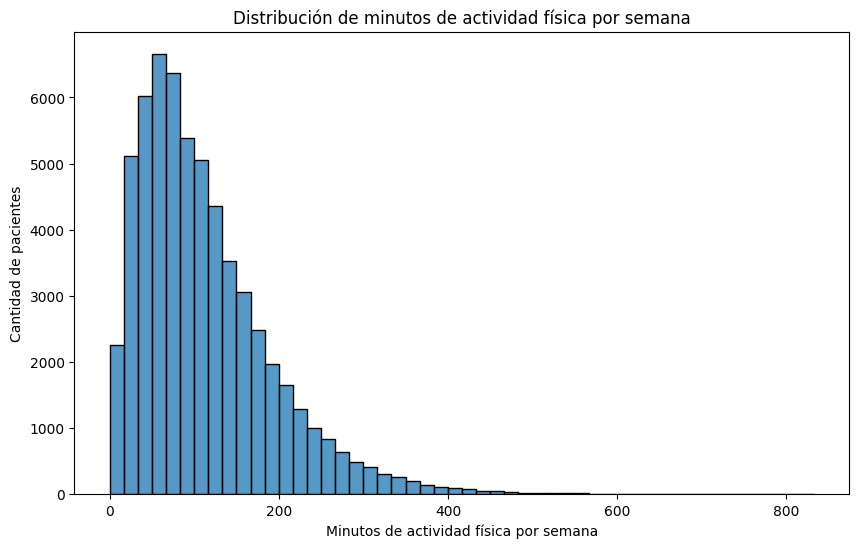

In [52]:
df_poseen_diabetes = df[df["diagnosed_diabetes"] == 1]
plt.figure(figsize=(10, 6))
sns.histplot(df_poseen_diabetes['physical_activity_minutes_per_week'], bins=50)
plt.xlabel("Minutos de actividad física por semana")
plt.ylabel("Cantidad de pacientes")
plt.title("Distribución de minutos de actividad física por semana")

Como es esperable a mayor actividad física menor incidencia de diabetes.

**Distribucion de horas dormidas por dia en relacion a la diabetes**

Text(0.5, 1.0, 'Distribución de horas de sueño por día')

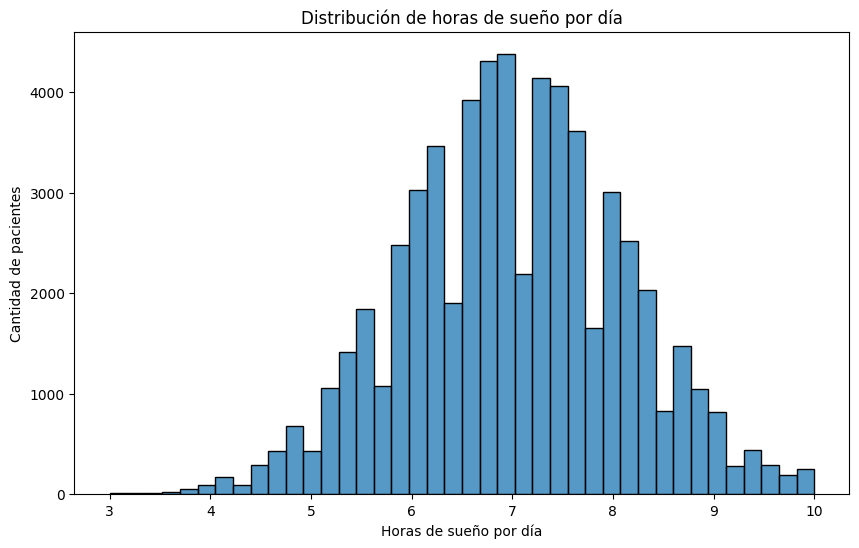

In [53]:
plt.figure(figsize=(10, 6))
sns.histplot(df_poseen_diabetes['sleep_hours_per_day'], bins=40)
plt.xlabel("Horas de sueño por día")
plt.ylabel("Cantidad de pacientes")
plt.title("Distribución de horas de sueño por día")

No se observa una clara relacion entre la cantidad de horas de sueño por dia y el poseer diabetes

**Distribucion de personas con antecedentes familiares diabeticos y poseer diabetes**

Text(0.5, 1.0, 'Proporción de diagnóstico de diabetes en pacientes con antecedentes familiares')

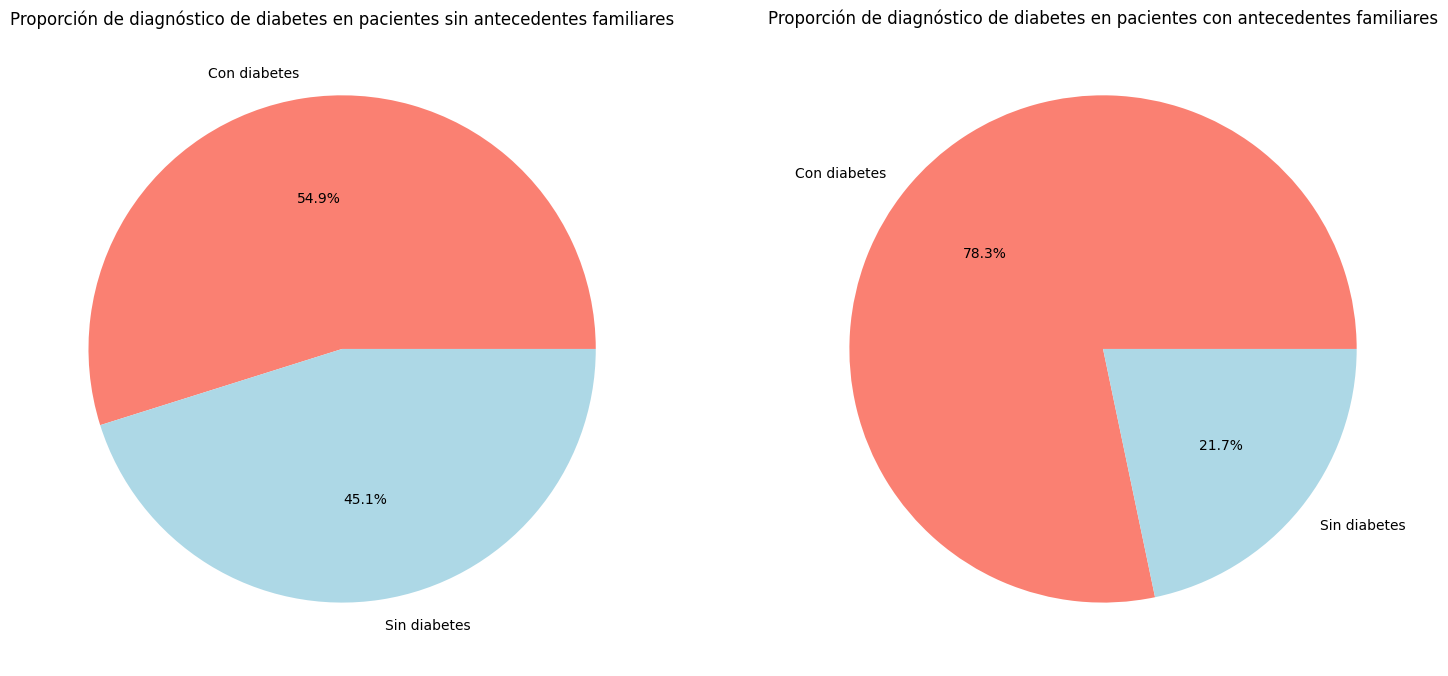

In [90]:
df_antecedentes_familiares = df.groupby("family_history_diabetes")["diagnosed_diabetes"].value_counts(normalize=True).unstack().fillna(0).reset_index()
df_poseen_diabetes_antecedentes_familiares = df_antecedentes_familiares.loc[df_antecedentes_familiares["family_history_diabetes"] == 1]
df_no_poseen_diabetes_antecedentes_familiares = df_antecedentes_familiares.loc[df_antecedentes_familiares["family_history_diabetes"] == 0]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 10))

ax1.pie(df_no_poseen_diabetes_antecedentes_familiares[[1, 0]].values[0], labels=["Con diabetes", "Sin diabetes"], autopct='%1.1f%%', colors=['salmon', 'lightblue'])
ax1.set_title("Proporción de diagnóstico de diabetes en pacientes sin antecedentes familiares")

ax2.pie(df_poseen_diabetes_antecedentes_familiares[[1, 0]].values[0], labels=["Con diabetes", "Sin diabetes"], autopct='%1.1f%%', colors=['salmon', 'lightblue'])
ax2.set_title("Proporción de diagnóstico de diabetes en pacientes con antecedentes familiares")

Como es esperable, las personas con antecesores con diabetes son mas propensas a poseer diabetes. Mientras que la distribucion de persona sin antecesores con diabetes es casi la misma